<a href="https://colab.research.google.com/github/Olowojaye/PersonalProjects/blob/main/iode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Crossing a road at an angle?
Look at the attached picture. If you were walking from point A to point B that is L meters further down the street, it is obviously shorter to walk in a straight line between the two points (Blue line), rather than crossing the road first (via the crosswalk) and then walking alongside the road for L meters (Red lines)

Your task is to write a script that accomplishes the following:
 1. Calculates the distance that you save by crossing at an angle for any given distance L
 2. Calculates the additional distance travelled on the road by crossing at an angle.
 3. Demonstrates on a graph the upper bound of the distance saved by increasing L
 4. Finds the length L, within 2 decimal points, where the distance saved no longer exceeds the additional distance travelled on the road. That is, the length L when you risk more than you gain.
 5. Demonstrates point 4 on a graph 

You should assume that both sides of the road are straight lines, they are infinitely long, and that they are parallel.
![image.png](attachment:image.png)

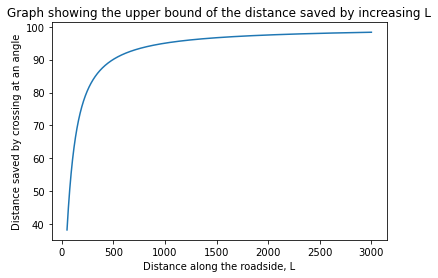

As shown in the graph above, the curve flattens out when saved distance became approximately:  98.334


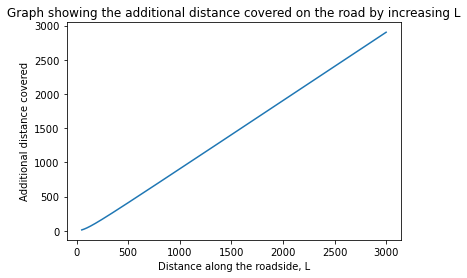

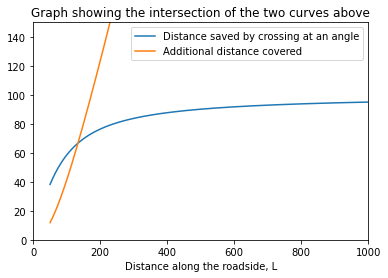

Hence, the length L where the distance saved no longer exceeds the additional distance travelled on the road is 133.33 which is 33.33 percent higher than the distance along the crosswalk.


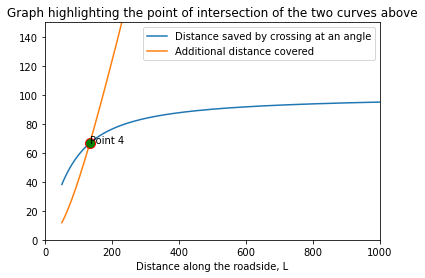

In [ ]:
# Write  your code and  comments here  below

# Let d_blue_line be the distance from A to B along the blue line

# Let d_crosswalk be the distance along the crosswalk

# Let d_red_lines = d_crosswalk + L be the distance along the red lines

# By Pythagoras' theorem for the right-angled triangle,
# (d_blue_line)^2 = (d_crosswalk)^2 + L^2

# Since d_crosswalk is constant, we assume:
d_crosswalk = 100

# We then examine the distance saved by crossing at an angle, and  
# the additional distance travelled on the road by crossing at an angle, as follows:

# 1. To calculate the distance that you save by crossing at an angle for any given distance L
def saved_distance(L):
    d_blue_line = (d_crosswalk**2 + L**2)**0.5
    d_red_lines = d_crosswalk + L
    d_saved = d_red_lines - d_blue_line 
    return d_saved

# 2. To calculate the additional distance travelled on the road by crossing at an angle
def additional_distance(L):
    d_blue_line = (d_crosswalk**2 + L**2)**0.5
    d_red_lines = d_crosswalk + L
    d_additional = d_blue_line - d_crosswalk
    return d_additional

# 3. To demonstrate on a graph the upper bound of the distance saved by increasing L
# We examine values from L from 50 to 3000, and the corresponding values of d_saved
# Import the required libraries
import numpy as np
import matplotlib.pyplot as plt
# Create a list of Ls
list_L = [i for i in np.arange(50, 3000.01, 0.01)] # Floats from 50 to 3000, taking 0.01 steps
# Create a list of corresponding d_saved
list_d_saved = [saved_distance(i) for i in list_L]
# To show a graph of L against d_saved:
x = np.array(list_L)
y1 = np.array(list_d_saved)
plt.plot(x, y1)
plt.title("Graph showing the upper bound of the distance saved by increasing L")
plt.xlabel("Distance along the roadside, L")
plt.ylabel("Distance saved by crossing at an angle")
plt.show()
print("As shown in the graph above, the curve flattens out when saved distance became approximately: ", 
      round(saved_distance(3000), 3))

# 4. To find the length L, within 2 decimal points, where the distance saved no longer 
# exceeds the additional distance travelled on the road. That is, the length L when you risk more than you gain.
# First, we find the additional distance travelled for each L
list_d_additional = [additional_distance(i) for i in list_L]
# We examine a graph of L against d_additional:
x = np.array(list_L)
y2 = np.array(list_d_additional)
plt.plot(x, y2)
plt.title("Graph showing the additional distance covered on the road by increasing L")
plt.xlabel("Distance along the roadside, L")
plt.ylabel("Additional distance covered")
plt.show()
# We examine the intersection of the two curves
plt.plot(x, y1, label="Distance saved by crossing at an angle")
plt.plot(x, y2, label="Additional distance covered")
plt.ylim(0, 150)
plt.xlim(0, 1000)
plt.title("Graph showing the intersection of the two curves above")
plt.xlabel("Distance along the roadside, L")
plt.legend()
plt.show()
# We obtain L at the point of intersection, and approximate to two decimal points
q = []
for i in list_L:
    if round(saved_distance(i), 2) == round(additional_distance(i), 2):
        q.append(i)
mean_q = sum(q) / len(q)
approx = round(mean_q, 2)
print("Hence, the length L where the distance saved no longer exceeds the additional distance travelled on the road is",
     approx, "which is", round((approx - d_crosswalk)/(0.01*d_crosswalk), 2), "percent higher than the distance along the crosswalk." )
        
# 5. To show point 4 on a graph:
plt.plot(x, y1, label="Distance saved by crossing at an angle")
plt.plot(x, y2, label="Additional distance covered")
plt.ylim(0, 150)
plt.xlim(0, 1000)
plt.plot(mean_q, saved_distance(mean_q), marker='o', markersize=10, 
          markeredgecolor="red", markerfacecolor="green")
plt.text(mean_q, saved_distance(mean_q), "Point 4")
plt.title("Graph highlighting the point of intersection of the two curves above")
plt.xlabel("Distance along the roadside, L")
plt.legend()
plt.show()

# 2) Fetch the data
Use requests _get_ to load the data from http://cs.stir.ac.uk/~soh/BD2spring2022/assignmentdata.php into an XML tree, then:
- extract the root element as separate variable, and display the root tag. 
- extract the two children of the root element into another two separate variables, and display their tags as well.

You will need to provide a single parameter to the get request, it has been provided in the code cell below for your convenience, as has the url.

Use Python to accomplish every step of this, i.e. __do not__ manually save the data into a file and then read the file with open() or something equivalent.

Name the tree variable *tree*, the root element *root*, and the children elements *tweets_branch* and *cities_branch*


In [ ]:
import xml.etree.ElementTree as ET
import requests
url = "http://cs.stir.ac.uk/~soh/BD2spring2022/assignmentdata.php"
params = {'data':'spsrqpt'}


# Write  your code and  comments here  below  

# Load data into an XML tree
req = requests.get(url=url, params=params)
tree = ET.ElementTree(ET.fromstring(req.content))

# Extract root element as a separate variable
root = tree.getroot()

# Display the root tag
print("Root tag is:", root.tag)

# Extract the two children of the root element into another two separate variables
tweets_branch = root[0] # First child
cities_branch = root[1] # Second child

# Display tags of the two children
print("Tag of first child is:", tweets_branch.tag)
print("Tag of second child is:", cities_branch.tag)

Root tag is: twitter_data
Tag of first child is: tweets
Tag of second child is: cities


# 3) Separate the two branches into two lists of dictionaries
Create two variables __cities__ and __tweets__ that contain each main branch of the XML tree as lists of dictionaries.  
Make sure that the data values are of appropriate types.  
Print out the field names and values (keys and values) of one city and one tweet.

*hint: latitude and longitude might be best kept as strings*  

In [ ]:
# Write  your code and  comments here  below

# Create lists of dictionaries with yet-to-be-defined values
cities = [{'city_ascii': '', 'lat': '', 'lng': '', 'country': '', 'iso2': '',
          'iso3': '', 'capital': '', 'population': ''} for data in root[1]]
tweets = [{'Name': '', 'Phone': '', 'Email': '', 'Location': '', 'GenderID': '', 
          'Tweet': '', 'City': '', 'Country': '', 'Age': ''} for data in root[0]]

# Iterate through the root element to assign dictionary values
for key in tweets[0]:
    for index, content in enumerate(list(root[0].iter(key))):
        tweets[index][key] = content.text
    
for key in cities[0]:
    for index, content in enumerate(list(root[1].iter(key))):
        cities[index][key] = content.text

# Change data types of Age in tweets and population in cities, to integers
for data in tweets:
    data['Age'] = int(data['Age'])

for data in cities:
    data['population'] = int(data['population'])
        
# Examine the first element in each list 
print(cities[0])
print(tweets[0])

{'city_ascii': 'Katherine', 'lat': '-14.4667', 'lng': '132.2667', 'country': 'Australia', 'iso2': 'AU', 'iso3': 'AUS', 'capital': None, 'population': 1488}
{'Name': 'Kenyon Conley', 'Phone': '0327 103 9485', 'Email': 'malesuada@lobortisClassaptent.edu', 'Location': '45.5333, -73.2833', 'GenderID': 'male', 'Tweet': "#FollowFriday @DanielleMorrill - She's with @Seattle20 and @Twilio. Also fun to talk to.  #entrepreneur", 'City': 'Saint-Basile-le-Grand', 'Country': 'Canada', 'Age': 34}


# 4) How many unique City - Country pairs exist in the data?
Find out how many different locations are represented in the twitter data with City and Country pairs.  
Does the tweet data contain more, less, or equal number of pairs?

- Print out the 10 most populated cities (largest)
- Print out the __number__ of unique pairs and show that they match the number of cities in the cities branch.

You can either use ElementTree methods on the XML tree itself or work with the list of dictionaries variables in addition to any looping and built-in functionality you see fit.  


In [ ]:
# Write  your code and  comments here  below

# Create a list of unique city and country pairs, and determine its length
city_country_unique = []
for data in cities:
    dict = {'city_ascii': '', 'country': '', 'population': ''}
    dict['city_ascii'] = data['city_ascii']
    dict['country'] = data['country']
    dict['population'] = data['population']
    if dict not in city_country_unique:
        city_country_unique.append(dict)
        
print("The number of unique pairs is:", len(city_country_unique))
print("The number of cities in the cities branch is:", len(cities))

# Obtain the 10 most populated cities by sorting the city_country_unique list
top_10 = sorted(city_country_unique, key = lambda i: i['population'], reverse=True)[0:10]
print("The 10 most populated cities are:",top_10)

The number of unique pairs is: 40
The number of cities in the cities branch is: 40
The 10 most populated cities are: [{'city_ascii': 'Ruiming', 'country': 'China', 'population': 640600}, {'city_ascii': 'Staten Island', 'country': 'United States', 'population': 476143}, {'city_ascii': 'Jiangshan', 'country': 'China', 'population': 467862}, {'city_ascii': "Al Bayda'", 'country': 'Libya', 'population': 250000}, {'city_ascii': 'Aachen', 'country': 'Germany', 'population': 247380}, {'city_ascii': 'Singkawang', 'country': 'Indonesia', 'population': 230376}, {'city_ascii': 'Narashino', 'country': 'Japan', 'population': 173716}, {'city_ascii': 'Botucatu', 'country': 'Brazil', 'population': 139494}, {'city_ascii': 'Paulinia', 'country': 'Brazil', 'population': 97702}, {'city_ascii': 'Kilosa', 'country': 'Tanzania', 'population': 91889}]


# 5) Extract the data into Pandas Dataframes
Create __2__ Pandas Dataframes from the list of dictionaries and make sure you use appropriate data types for each column  
There are missing values in the data and make sure they are represented in the Dataframe with *NaN*  

Call the Dataframes variable __raw_tweet_data__ and __cities_data__

Include the ID of each person as a column and display the first 5 rows of the dataframe

*hint: each person's id is the id attribute of the corresponding xml tag*  

In [ ]:
# Write  your code and  comments here  below 
# Import the required library
import pandas as pd

# Include ID of each person in tweets list:
for index in range(len(tweets)):
    tweets[index].update(root[0][index].attrib)
    
# Create dataframes from lists of dictionaries
raw_tweet_data = pd.DataFrame(tweets)
cities_data = pd.DataFrame(cities)


# Fill missing data with NaN
raw_tweet_data.fillna(float('NaN'))
cities_data.fillna(float('NaN'))

raw_tweet_data.head()

,Name,Phone,Email,Location,GenderID,Tweet,City,Country,Age,id
0,Kenyon Conley,0327 103 9485,malesuada@lobortisClassaptent.edu,"45.5333, -73.2833",male,#FollowFriday @DanielleMorrill - She's with @S...,Saint-Basile-le-Grand,Canada,34,16620625 5686
1,Griffin Norton,0306 178 7917,in.dolor.Fusce@necmalesuadaut.ca,"52.0000, 84.9833",male,!!!Veryy Bored!!! ~~Craving Million's Of Milk...,Belokurikha,Russia,33,16310427-5502
2,Benjamin Haley,(019348) 22077,posuere@hymenaeos.edu,"-14.4667, 132.2667",male,i knew this would happen !! i'd start feeling ...,Katherine,Australia,62,16501010 4957
3,Thaddeus Ashley,0845 46 42,penatibus.et@Donecfeugiatmetus.net,"40.5626, -74.5743",male,#bgt I like Julian smith as well his music is ...,Finderne,United States,49,16110430 8679
4,Ian Ramos,0800 816 7844,pede.nonummy@Vestibulumut.edu,"27.7526, -82.7394",male,will be online in a lil' bit,South Pasadena,United States,26,16990624/4174


# 6) Clean the twitter data
Find the missing values and replace, remove, and standardise as appropriate
- ID should be standardised to XXXXXXXX-XXXX (i.e. 8 and 4 digits separated by a dash), make the ID the index of the dataframe
- Records with missing tweets, age, name, city, or location should result in a removal of the data point
- Phone numbers should be strings but only contain digits, no other characters or whitespaces and missing phone numbers should be replaced with the string '000'
- Missing country should be replaced with the country that corresponds to the city if possible.
 * I.e. find another data point with the same city and copy the country, if there is no other record with the same city then remove.
 * __This does not need to be completed programmatically__, that is, you can use one cell to supply the information and then another cell to fix it with direct assignment statements. Full marks will be given for this approach if the intensions are clear and the code is well formed and documented.

Store the resulting cleaned dataframe in __cleaned_tweet_data__  
__Print the total number of records and the number of rows with missing values before and after cleaning__

In [ ]:
# Write  your code and  comments here  below

# To print the total number of records and the number of rows with missing values before cleaning
print("Total number of records before cleaning is:", raw_tweet_data.shape[0])
print("Total number of rows with missing values before cleaning is:", raw_tweet_data.isna().any(axis=1).sum())

# Check number of missing values in each column:
print("Total number of missing values in each column before cleaning is:")
print(raw_tweet_data.isnull().sum())

Total number of records before cleaning is: 1400
Total number of rows with missing values before cleaning is: 10
Total number of missing values in each column before cleaning is:
Name        2
Phone       0
Email       0
Location    4
GenderID    0
Tweet       1
City        1
Country     2
Age         0
id          0
dtype: int64


In [ ]:
# Since there is no row with missing ID, we proceed to standardize the ID
raw_tweet_data.id = raw_tweet_data.id.str[0:8] + '-' + raw_tweet_data.id.str[9:13]

# Make ID the index of the dataframe
new_tweet_df = raw_tweet_data.set_index('id')

# Remove records with missing tweets, age, name, city, or location
new_tweet_df = new_tweet_df.dropna(subset=['Age', 'Tweet', 'City', 'Location', 'Name'])

# As seen in the cell above, there are no missing phone numbers. 
# Thus, we remove other characters and whitespaces from phone numbers
num_list = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
for data in new_tweet_df.Phone:
    for letter in data:
        if letter not in num_list:
            new_tweet_df.Phone = new_tweet_df.Phone.str.replace(letter, '')
            
new_tweet_df.head()

,Name,Phone,Email,Location,GenderID,Tweet,City,Country,Age
id,,,,,,,,,
16620625-5686,Kenyon Conley,03271039485,malesuada@lobortisClassaptent.edu,"45.5333, -73.2833",male,#FollowFriday @DanielleMorrill - She's with @S...,Saint-Basile-le-Grand,Canada,34
16310427-5502,Griffin Norton,03061787917,in.dolor.Fusce@necmalesuadaut.ca,"52.0000, 84.9833",male,!!!Veryy Bored!!! ~~Craving Million's Of Milk...,Belokurikha,Russia,33
16501010-4957,Benjamin Haley,01934822077,posuere@hymenaeos.edu,"-14.4667, 132.2667",male,i knew this would happen !! i'd start feeling ...,Katherine,Australia,62
16110430-8679,Thaddeus Ashley,08454642,penatibus.et@Donecfeugiatmetus.net,"40.5626, -74.5743",male,#bgt I like Julian smith as well his music is ...,Finderne,United States,49
16990624-4174,Ian Ramos,08008167844,pede.nonummy@Vestibulumut.edu,"27.7526, -82.7394",male,will be online in a lil' bit,South Pasadena,United States,26


In [ ]:
# Finally,we check if there are yet missing countries after all we have done so far
new_tweet_df.isnull().sum()

Name        0
Phone       0
Email       0
Location    0
GenderID    0
Tweet       0
City        0
Country     2
Age         0
dtype: int64

In [ ]:
# Display the two rows with missing country
new_tweet_df[new_tweet_df['Country'].isnull()]

,Name,Phone,Email,Location,GenderID,Tweet,City,Country,Age
id,,,,,,,,,
16571113-1622,Hu Baxter,08005364415,Nullam@Sedeueros.co.uk,"46.6236, 16.5458",male,They cut the sound on one of them....,Lenti,None,70
16970627-9032,Shad Blanchard,05609827747,eros@Proinvelarcu.co.uk,"-14.4667, 132.2667",male,I just wanna swim some laps but all the lanes ...,Katherine,None,32


In [ ]:
# Check dataframe for rows with same city (Lenti) as the first one
new_tweet_df[new_tweet_df['City']=='Lenti'].head()

,Name,Phone,Email,Location,GenderID,Tweet,City,Country,Age
id,,,,,,,,,
16880117-3249,Mannix Wall,08001111,penatibus@Sedpharetrafelis.org,"46.6236, 16.5458",male,&quot;Block EVERYTHING&quot;.. says China ht...,Lenti,Hungary,32
16571113-1622,Hu Baxter,08005364415,Nullam@Sedeueros.co.uk,"46.6236, 16.5458",male,They cut the sound on one of them....,Lenti,None,70
16020928-3043,Vaughan Rush,0500409171,ut.pharetra.sed@Proinvel.edu,"46.6236, 16.5458",male,My foot's asleep! It won't wake up! Rawr.,Lenti,Hungary,33
16140811-4674,Bruce Garrison,0500943807,gravida@nequepellentesque.com,"46.6236, 16.5458",male,;( noooo! why? things are so complicated if I ...,Lenti,Hungary,52
16310725-8299,Xander Whitehead,07654786324,amet.dapibus.id@id.edu,"46.6236, 16.5458",male,I wanna go to the apple store and get a free i...,Lenti,Hungary,22


In [ ]:
# As seen above, the country is Hungary, we insert
new_tweet_df.at['16571113-1622', 'Country'] = 'Hungary'

In [ ]:
# Check dataframe for rows with same city (Katherine) as the second one
new_tweet_df[new_tweet_df['City']=='Katherine'].head()

,Name,Phone,Email,Location,GenderID,Tweet,City,Country,Age
id,,,,,,,,,
16501010-4957,Benjamin Haley,01934822077,posuere@hymenaeos.edu,"-14.4667, 132.2667",male,i knew this would happen !! i'd start feeling ...,Katherine,Australia,62
16590616-6664,Edward Walsh,05698597230,faucibus@semelitpharetra.net,"-14.4667, 132.2667",male,- @serialseb Always thought time estimates sho...,Katherine,Australia,30
16021227-1654,Cruz Burris,01171451281,Etiam@nunc.com,"-14.4667, 132.2667",male,on about 5 slices of pizza.... :\ about half.,Katherine,Australia,33
16551118-9234,Dean Vinson,05680661966,enim@diamdictumsapien.org,"-14.4667, 132.2667",male,i wish paramore won for best song... boo,Katherine,Australia,60
16140630-4533,Brent Durham,09696542970,ante.bibendum@est.edu,"-14.4667, 132.2667",male,I guess I wouldn't be a true Cleveland sports ...,Katherine,Australia,56


In [ ]:
# As seen above, the country is Australia, we insert
new_tweet_df.at['16970627-9032', 'Country'] = 'Australia'

In [ ]:
# Done. We view the first few rows, and also check to see that there are no missing values left
cleaned_tweet_data = new_tweet_df

print("Total number of records after cleaning is:", cleaned_tweet_data.shape[0])
print("Total number of rows with missing values after cleaning is:", cleaned_tweet_data.isna().any(axis=1).sum())

Total number of records after cleaning is: 1392
Total number of rows with missing values after cleaning is: 0


# 7) Validating
Use the data from __cities_data__ to check if there are any mismatches in the data.
- Are there latitudes and longitudes that don't match the City name?
- Are there any cities that are "located" in the wrong country?

Correct where possible, remove otherwise.  
Assume the cities data is accurate and use the "city" columns to match names

Correct the __cleaned_tweet_data__ in place and __print, display or comment on how many mismatches you found__

This does not have to be done programmatically in a single comprehensive search-and-fix code. You can use 1 or more cells and "hard code" the search and the fixes with incremental steps.  
For example, the first cell prints out info of mismatches, what and where they are and the next cell uses that info to fix the mismatches. 

In [ ]:
# Write  your code and  comments here  below  
cities_data.head()

,city_ascii,lat,lng,country,iso2,iso3,capital,population
0,Katherine,-14.4667,132.2667,Australia,AU,AUS,None,1488
1,South Pasadena,27.7526,-82.7394,United States,US,USA,None,5095
2,Beaconsfield,45.4333,-73.8667,Canada,CA,CAN,None,19115
3,Ferney-Voltaire,46.2558,6.1081,France,FR,FRA,None,9766
4,Jiangshan,28.7412,118.6225,China,CN,CHN,None,467862


In [ ]:
# Let's extract the columns we need from cities_data, combine and rename them to
# look similar to what obtains in corresponding columns of cleaned_tweet_data
city_from_cities_raw = cities_data[['city_ascii', 'lat', 'lng', 'country']]
city_from_cities_raw['Location'] = city_from_cities_raw.lat + ', ' + city_from_cities_raw.lng
city_from_cities = city_from_cities_raw[['city_ascii', 'Location', 'country']]
city_from_cities.columns = ['City', 'Location', 'Country']

<ipython-input-16-8eeb32667e8b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_from_cities_raw['Location'] = city_from_cities_raw.lat + ', ' + city_from_cities_raw.lng


In [ ]:
# Check for duplicate cities in city_from_cities
city_from_cities[city_from_cities.duplicated(subset='City')]

,City,Location,Country


In [ ]:
# Check if any city in tweet_data is not in cities_data
for city in set(cleaned_tweet_data.City):
  if city not in set(city_from_cities.City):
    print(city)

San Ramón
Al Bayḑā’
Mníšek pod Brdy
Dīla
Paulínia


In [ ]:
city_from_cities

,City,Location,Country
0,Katherine,"-14.4667, 132.2667",Australia
1,South Pasadena,"27.7526, -82.7394",United States
2,Beaconsfield,"45.4333, -73.8667",Canada
3,Ferney-Voltaire,"46.2558, 6.1081",France
4,Jiangshan,"28.7412, 118.6225",China
5,Dila,"6.4104, 38.3100",Ethiopia
6,Gibara,"21.1072, -76.1367",Cuba
7,Hampstead,"42.8821, -71.1709",United States
8,West Islip,"40.7097, -73.2971",United States
9,Paulinia,"-22.7611, -47.1542",Brazil


In [ ]:
# By inspection of the city_from_cities dataframe above, we see that the cities
# are present, but without the accents. We can remove the string accents as follows
cleaned_tweet_data['City'][cleaned_tweet_data['City']=='Al Bayḑā’'] = "Al Bayda'"
cleaned_tweet_data['City'][cleaned_tweet_data['City']=='Dīla'] = 'Dila'
cleaned_tweet_data['City'][cleaned_tweet_data['City']=='Mníšek pod Brdy'] = 'Mnisek pod Brdy'
cleaned_tweet_data['City'][cleaned_tweet_data['City']=='Paulínia'] = 'Paulinia'
cleaned_tweet_data['City'][cleaned_tweet_data['City']=='San Ramón'] = 'San Ramon'

<ipython-input-20-e37ab37148fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_tweet_data['City'][cleaned_tweet_data['City']=='Al Bayḑā’'] = "Al Bayda'"
<ipython-input-20-e37ab37148fc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_tweet_data['City'][cleaned_tweet_data['City']=='Dīla'] = 'Dila'
<ipython-input-20-e37ab37148fc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_tweet_data['City'][cleaned_tweet_d

In [ ]:
# Check again if any city in tweet_data is not in cities_data
for city in list(cleaned_tweet_data.City):
  if city not in list(city_from_cities.City):
    print(city)

In [ ]:
# We can now correct any wrong location or country in cleaned_tweet_data
# using the accurate data from cities_data, as follows:
num_wrong_location = 0  # To track the number of wrong locations found
num_wrong_country = 0   # To track the number of wrong countries found
cleaned_tweet_data.reset_index(inplace=True) # reset index for easy referencing
for index, city in enumerate(list(cleaned_tweet_data.City)):
  city_detail = city_from_cities[city_from_cities['City']==city].reset_index(drop=True)
  if cleaned_tweet_data.at[index, 'Country'] != city_detail.at[0, 'Country']:
    print('Wrong country found in row', index+1)
    num_wrong_country += 1
    cleaned_tweet_data['Country'][cleaned_tweet_data['City']==city] = city_detail.at[0, 'Country']
  if cleaned_tweet_data.at[index,'Location'] != city_detail.at[0, 'Location']:
    print('Wrong location found in row', index+1)
    num_wrong_location += 1
    cleaned_tweet_data['Location'][cleaned_tweet_data['City']==city] = city_detail.at[0, 'Location']
print('Total number of wrong countries corrected is:', num_wrong_country)
print('Total number of wrong locations (latitudes and longitudes) corrected is:', num_wrong_location)
# Restore index to id as before
cleaned_tweet_data.set_index('id', inplace=True)
# View first 5 rows afterwords
cleaned_tweet_data.head()

Wrong location found in row 6
Wrong location found in row 197


<ipython-input-22-b15bc209c4e6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_tweet_data['Location'][cleaned_tweet_data['City']==city] = city_detail.at[0, 'Location']


Wrong location found in row 674
Total number of wrong countries corrected is: 0
Total number of wrong locations (latitudes and longitudes) corrected is: 3


,Name,Phone,Email,Location,GenderID,Tweet,City,Country,Age
id,,,,,,,,,
16620625-5686,Kenyon Conley,03271039485,malesuada@lobortisClassaptent.edu,"45.5333, -73.2833",male,#FollowFriday @DanielleMorrill - She's with @S...,Saint-Basile-le-Grand,Canada,34
16310427-5502,Griffin Norton,03061787917,in.dolor.Fusce@necmalesuadaut.ca,"52.0000, 84.9833",male,!!!Veryy Bored!!! ~~Craving Million's Of Milk...,Belokurikha,Russia,33
16501010-4957,Benjamin Haley,01934822077,posuere@hymenaeos.edu,"-14.4667, 132.2667",male,i knew this would happen !! i'd start feeling ...,Katherine,Australia,62
16110430-8679,Thaddeus Ashley,08454642,penatibus.et@Donecfeugiatmetus.net,"40.5626, -74.5743",male,#bgt I like Julian smith as well his music is ...,Finderne,United States,49
16990624-4174,Ian Ramos,08008167844,pede.nonummy@Vestibulumut.edu,"27.7526, -82.7394",male,will be online in a lil' bit,South Pasadena,United States,26


# 8) Grouping by country and city
Find out 
- the mean, median, and standard deviation of the age for each country.
- Answer the following:
 - What country has the most tweeters?
 - What __city__ has the most tweeters per capita?
 
The cities data contains information about population

In [ ]:
# Write  your code and  comments here  below

# Check for duplicate names in cleaned_tweet_data
cleaned_tweet_data[cleaned_tweet_data.duplicated(subset='Name')]

,Name,Phone,Email,Location,GenderID,Tweet,City,Country,Age
id,,,,,,,,,


In [ ]:
# To obtain the age statistics for each country
age_df = cleaned_tweet_data.groupby('Country')
stat_dic = {'Country': [], 'Mean': [], 'Median': [], 'Standard deviation': [], 'Total Number of tweeters': []}
for country in set(cleaned_tweet_data.Country):
  stat_dic['Country'].append(country)
  stat_dic['Mean'].append(age_df.get_group(country).Age.mean())
  stat_dic['Median'].append(age_df.get_group(country).Age.median())
  stat_dic['Standard deviation'].append(age_df.get_group(country).Age.std())
  stat_dic['Total Number of tweeters'].append(len(age_df.get_group(country).Age)) # Since there are no duplicate names

stat_df = pd.DataFrame(stat_dic)
print('The age statistics for each country is shown below:')
stat_df

The age statistics for each country is shown below:


,Country,Mean,Median,Standard deviation,Total Number of tweeters
0,Australia,44.753425,43.0,14.471985,73
1,Libya,46.352941,50.0,15.895268,34
2,Czechia,48.875000,51.5,17.584359,32
3,Ukraine,45.347826,48.0,17.041683,23
4,Hungary,46.933333,49.0,16.241641,45
5,Cuba,51.407407,57.0,15.821746,27
6,Indonesia,42.500000,41.5,16.423850,36
7,France,46.619718,48.0,15.148188,71
8,Brazil,47.218750,50.0,15.922313,96
9,Russia,45.596774,45.0,17.565297,62


In [ ]:
# The country with the most tweeters is: 
stat_df[['Country']][stat_df['Total Number of tweeters']==max(stat_df['Total Number of tweeters'])]

,Country
14,United States


In [ ]:
# To determine which city has the most tweeters per capita
city_data = cleaned_tweet_data.groupby(by='City')
city_dic = {"City": [], "Total number of tweeters": [], 'Population': [], 'Tweeters per capita': []}
for city in set(cleaned_tweet_data.City):
  city_dic['City'].append(city)
  pop = cities_data['population'][cities_data['city_ascii']==city].reset_index()
  pop_val = pop.at[0, 'population']
  num_ = len(city_data.get_group(city).Name)  # Since there are no duplicate names
  city_dic['Population'].append(pop_val)
  city_dic['Total number of tweeters'].append(num_)
  city_dic['Tweeters per capita'].append(num_/pop_val)

city_df = pd.DataFrame(city_dic)
city_df

,City,Total number of tweeters,Population,Tweeters per capita
0,Hindley,39,25001,0.001560
1,Al Bayda',34,250000,0.000136
2,Hampstead,33,8625,0.003826
3,Singkawang,36,230376,0.000156
4,Finderne,42,5976,0.007028
5,Anacortes,42,18563,0.002263
6,Ferney-Voltaire,37,9766,0.003789
7,South Pasadena,39,5095,0.007655
8,Tonantins,32,4561,0.007016
9,Fultondale,31,9284,0.003339


In [ ]:
# The city with the most tweeters per capita is: 
city_df[['City']][city_df['Tweeters per capita']==max(city_df['Tweeters per capita'])]

,City
10,Katherine


# 9) Plot the age distribution by country
Create a figure that contains the distribution of age per country as box plots.  
For each box, visually show the mean and the confidence interval of the median in the figure, preferably using arguments of the plot function.

<AxesSubplot:title={'center':'Age'}, xlabel='Country'>

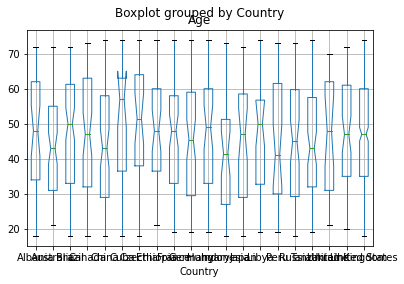

In [ ]:
# Write  your code and  comments here  below
cleaned_tweet_data.boxplot(column='Age', by='Country', notch=True)

# 10) Freestyle
Your answer will be judged by the clarity of the description, the creativity of the solution, and how realistic your suggested implementation is.

This is an opportunity to display what you have learnt in the module and how you believe it can be useful in practice.

### The task
Choose any dataset on Kaggle (https://www.kaggle.com/) and describe a simple data analysis you would want to do with that dataset.
- Provide the link to the dataset, and describe it __in your own words__ (very short, 3-10 sentences max)
- Justify your choice of the dataset (max 50 words)
- Document your process with a mix of appropriate comments and markdown boxes inbetween code boxes.
- Assume we have access to the dataset and if we would download it into the __current working directory__ we would be able to do the same analysis on our machine
 - If possible, don't make any other assumptions about the folder structure on the machine the code would be run on. That is, make your solution as OS and folder agnostic as possible.
- Implement as much of your idea as possible, using solutions you have learnt in this module. 
 - Go through the process of *load->inspect->clean->explore->visualise->etc* and document each step
- For the ideas that require solutions or tools not covered in this module, provide at least a brief description and suggestions of what tools or solutions you would use.
- Be as clear and concise as you possibly can

In [ ]:
# Provide your solution here and in any subsequent cell/box you deem necessary
# Use a mix of markdown and code cells.
# Write  your code and  comments here  below

**Classifying Iris Plants**

This project examines how one can categorize an Iris plant - whether it is Iris Setosa, Iris Versicolour, or Iris Virginica - by considering such attributes as its sepal length, sepal width, petal length, and petal width, all measured in centimeters.

The dataset used is downloaded from this [Kaggle link](https://www.kaggle.com/datasets/uciml/iris).

In [ ]:
# Load CSV file from workspace
dataset = pd.read_csv('Iris.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# To inspect if there are any inconsistencies in the data and cater for them
#Check for missing values
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
#No missing values in any of the columns
#Next, we check that all entries have the appropriate formatting
dataset.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [ ]:
# To clean the dataset, we set Id as index
dataset.set_index('Id', inplace=True)

In [ ]:
# Next, we explore the dataset
#Descriptive statistics
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
#Examine the correlation between the variables
dataset.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


This result suggests that petal length and petal width, being highly positively correlated (0.962757), would have approximately the same influence on determining the class if either of them was used instead of both.

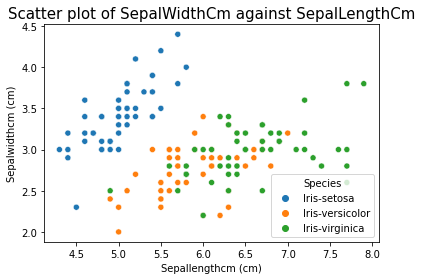

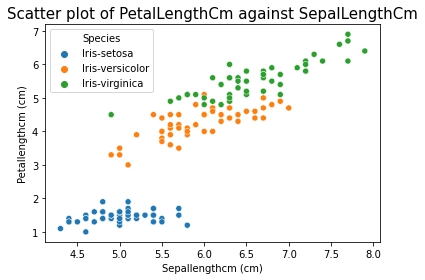

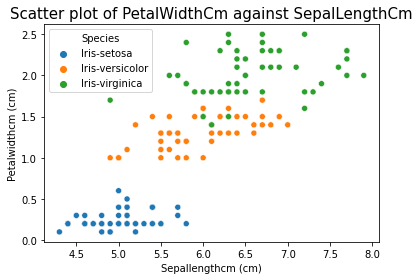

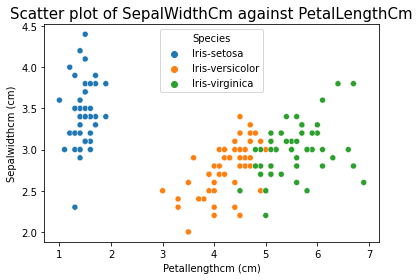

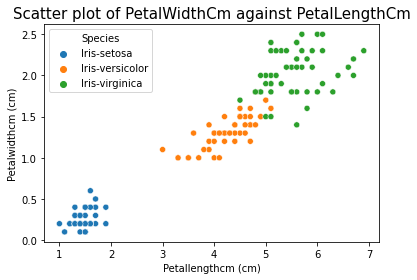

In [ ]:
#We can visualize the relationships using a scatter plot with 'class' as hue
import seaborn as sns

#Scatter plots, picking two attributes at a time, with 'Species' as hue
cols_ = list(dataset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].columns) #List containing features
for att_x in cols_:
  cols_.remove(att_x)
  for att_y in cols_:
    sns.scatterplot(data=dataset, x= att_x, y= att_y, hue="Species")
    plt.title('Scatter plot of {} against {}'.format(att_y, att_x), fontsize=15)
    plt.xlabel(att_x.capitalize() + " (cm)")
    plt.ylabel(att_y.capitalize() + " (cm)")
    plt.show()
    print('')


The last plot suggests that a reasonably-accurate categorization could be done using petal width and petal length attributes only.

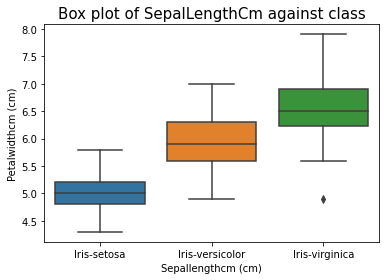

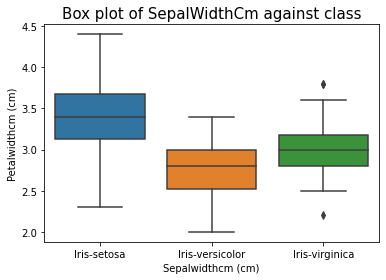

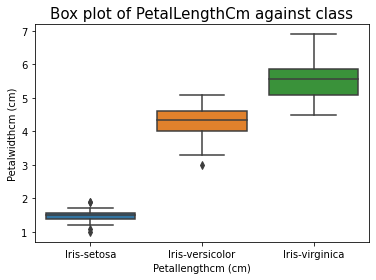

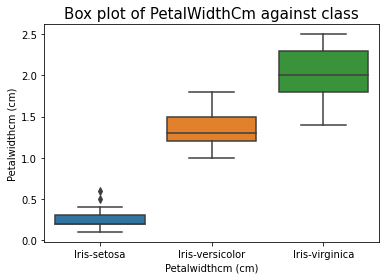

In [ ]:
#We also examine the distribution of each class using box plots
cols_ = list(dataset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].columns) #List containing features
for att_x in cols_:
  sns.boxplot(data=dataset, x= 'Species', y= att_x)
  plt.title('Box plot of {} against class'.format(att_x), fontsize=15)
  plt.xlabel(att_x.capitalize() + " (cm)")
  plt.ylabel(att_y.capitalize() + " (cm)")
  plt.show()
  print('')

This shows that a rough classification could be made using either petal width or petal length.